In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import json
from urllib.request import urlopen
import calplot
from scipy.stats import linregress
from folium import plugins
from sklearn.metrics import r2_score

# Data load and visualization

In [2]:

#path= r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\data_life.csv"
#data=pd.read_csv(path)
#data.head(2)
#data.columns
#data.shape"""

## life expectancy data

In [3]:
# life expectancy data
df = pd.read_csv(r"life_expectancy_by_country.csv")
df.head(5)

# copy df to df1
df1 = df.copy()
df1=df1.fillna(0)

# extract dates 2019-1960-
df_2019 = df1[df1['year'] == 2019]
df_2019.shape
df_2019= df_2019.rename(columns={'country_name':'Country Name'})
df_2019= df_2019.rename(columns={'value':'life_expectancy'})
df_2019

,country_code,Country Name,year,life_expectancy
59,ABW,Aruba,2019,76.248000
120,AFE,Africa Eastern and Southern,2019,63.755674
181,AFG,Afghanistan,2019,63.565000
242,AFW,Africa Western and Central,2019,57.555796
303,AGO,Angola,2019,62.448000
...,...,...,...,...
14960,XKX,Kosovo,2019,79.022000
15021,YEM,"Yemen, Rep.",2019,65.092000
15082,ZAF,South Africa,2019,66.175000
15143,ZMB,Zambia,2019,62.793000


In [7]:
# extract dates 2019-2000-
df_2019 = df1[df1['year'] == 2019]
df_2019 = df_2019[['country_name','value']]
df_2019.shape
df_2019= df_2019.rename(columns={'country_name':'Country Name'})
df_2019= df_2019.rename(columns={'value':'2019_life_expectancy'})
df_2019

df_2000 = df1[df1['year'] == 2000]
df_2000 = df_2000[['country_name','value']]
df_2000= df_2000.rename(columns={'country_name':'Country Name'})
df_2000= df_2000.rename(columns={'value':'2000_life_expectancy'})
df_2000

df_1960 = df1[df1['year'] == 1960]
df_1960 = df_1960[['country_name','value']]
df_1960= df_1960.rename(columns={'country_name':'Country Name'})
df_1960= df_1960.rename(columns={'value':'1960_life_expectancy'})
df_1960.head()



df_2013 = df1[df1['year'] == 2013]
df_2013 = df_2013[['country_name','value']]
df_2013= df_2013.rename(columns={'country_name':'Country Name'})
df_2013= df_2013.rename(columns={'value':'2013_life_expectancy'})
df_2013
#// change name of column country_name to "County Name"
#f_1960.rename(columns={'country_name':'Country Name'})


,Country Name,2013_life_expectancy
53,Aruba,75.636000
114,Africa Eastern and Southern,60.709863
175,Afghanistan,62.417000
236,Africa Western and Central,55.673406
297,Angola,59.307000
...,...,...
14954,Kosovo,78.587000
15015,"Yemen, Rep.",67.545000
15076,South Africa,62.533000
15137,Zambia,59.878000


## VARIABLES (GDP, Gini,Helath expediture) per capita


In [8]:
def R_squared (x, y):
    from sklearn.metrics import r2_score
    #slope, intercept = l_reg(x, y)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    x = x.to_numpy(dtype=None, copy=False)
    y = y.to_numpy(dtype=None, copy=False)
    N = len(x)
    ones=np.ones(N)
    SS_tot = np.sum( (y - np.mean(y)* ones)**2)
    
    f= slope*x +intercept
    SS_reg = np.sum( (np.mean(y)* ones - f )**2)
    R_= (SS_reg/ SS_tot)
    ###################################################### method reg
    SS_res = np.sum( (y* ones - f )**2)
    R_sq= 1- (SS_res/ SS_tot)
    ############################################### method general 
    r2_score= r2_score(y, f)# sklearn check
    ############################################### method general sklearn
    return  r2_score #r2_score

In [16]:
# GDP data
path_GDP= r"GDP_data\API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5358417.csv"
df_GDP=pd.read_csv(path_GDP, skiprows=4) # add skiprows=4 
df_GDP=df_GDP.drop(df_GDP.columns[[-1]], axis=1)
df_GDP= df_GDP.fillna(0)
#print(df_GDP.columns)
df_GDP.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913034,162.551683,172.00246,199.189238,179.387799,198.230368,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730


In [17]:
df_GDP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,0.000000,0.000000,0.000000
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [18]:
df_GDP_= df_GDP[["Country Name","2019", "2000", "1960"]]
df_GDP_m = pd.merge(df_GDP_, df_1960, on='Country Name', how='outer')
df_GDP_m = pd.merge(df_GDP_m, df_2000, on='Country Name', how='outer')
df_GDP_m = pd.merge(df_GDP_m, df_2019, on='Country Name', how='outer')
df_GDP_m.head(2)
#// df_GDP Nan =0 
df_GDP_m=df_GDP_m.fillna(0)
# remove lines with 0 or Nan values
df_GDP_m_2019=df_GDP_m[df_GDP_m['2019'] != 0]
df_GDP_m_2000=df_GDP_m[df_GDP_m['2000'] != 0]
df_GDP_m_1960=df_GDP_m[df_GDP_m['1960'] != 0]
df_GDP_m_2019=df_GDP_m[df_GDP_m['2019_life_expectancy'] != 0]
df_GDP_m_2000=df_GDP_m[df_GDP_m['2000_life_expectancy'] != 0]
df_GDP_m_1960=df_GDP_m[df_GDP_m['1960_life_expectancy'] != 0]
df_GDP_m_1960.head(2)

,Country Name,2019,2000,1960,1960_life_expectancy,2000_life_expectancy,2019_life_expectancy
0,Aruba,31650.760537,21023.157513,0.000000,64.152000,73.569000,76.248000
1,Africa Eastern and Southern,1512.270553,707.015752,162.913034,44.085552,51.964481,63.755674


In [19]:
df_GDP_m_1960.columns
aa= df_GDP_m_1960.loc[df_GDP_m_1960['Country Name']=="Japan"]["2019"]
aa
b =df_GDP_m_1960.loc[df_GDP_m_1960['Country Name']=="Japan"]["2019_life_expectancy"]
b

119    84.356341
Name: 2019_life_expectancy, dtype: float64

C:\Users\jakob\AppData\Local\Temp\ipykernel_6736\1398004240.py:39: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax[1,0].annotate("Japan", (x, y), fontsize=12, color="red", textcoords='axes fraction')


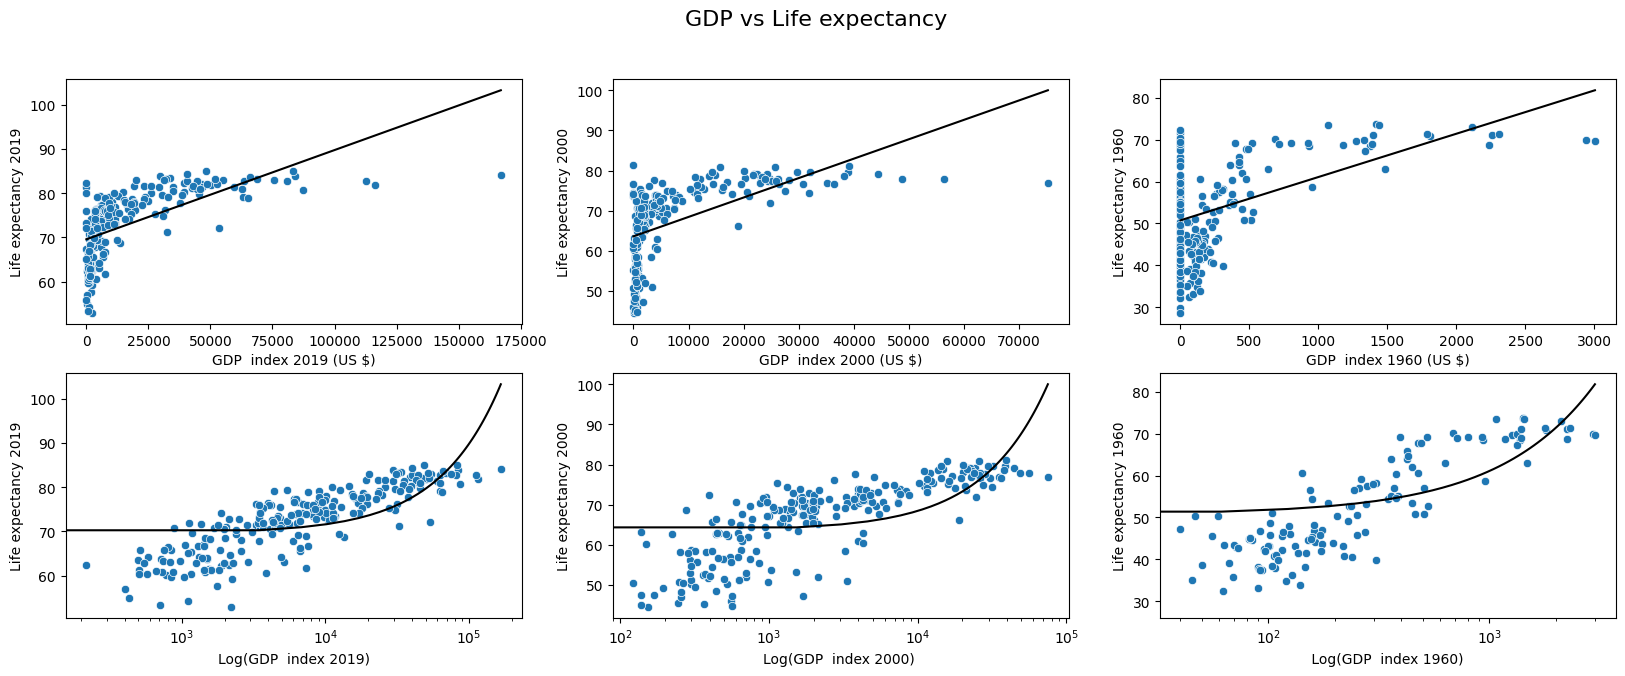

 R^2 2019 : 0.3882737115649637
 R^2 2000 : 0.31041573466246253
 R^2 1960 : 0.19534106995919276


In [20]:
#// create a figure with 3 separeted figure of scatter plot for 2019, 2000 and 1960 of df_GDP_m against life expectancy_2019, life expectancy_2000 and life expectancy_1960
fig, ax = plt.subplots(2,3, figsize=(20,7))
#// put overall  figure  title
fig.suptitle('GDP vs Life expectancy', fontsize=16)
# xfid = variable for plotting the linear regression


ax[0,0].set_xlabel('GDP  index 2019 (US $)')
ax[0,0].set_ylabel('Life expectancy 2019')
sns.scatterplot(x='2019', y=str('2019_life_expectancy'), data=df_GDP_m_2019, ax=ax[0,00])
# LInear regression
xfid = np.linspace(df_GDP_m_2019['2019'].min(),df_GDP_m_2019['2019'].max()) 
sl, inte, r_value, p_value, std_err = linregress((df_GDP_m_2019['2019']), ( df_GDP_m_2019['2019_life_expectancy']))
ax[0,0].plot(xfid, sl*xfid+inte, color="black")

sns.scatterplot(x='2000', y=str('2000_life_expectancy'), data=df_GDP_m_2000, ax=ax[0,1])
ax[0,1].set_xlabel('GDP  index 2000 (US $)')
ax[0,1].set_ylabel('Life expectancy 2000')
# LInear regression
xfid = np.linspace(df_GDP_m_2000['2000'].min(),df_GDP_m_2000['2000'].max()) 
sl, inte, r_value, p_value, std_err = linregress((df_GDP_m_2000['2000']), ( df_GDP_m_2000['2000_life_expectancy']))
ax[0,1].plot(xfid, sl*xfid+inte, color="black")

sns.scatterplot(x='1960', y=str('1960_life_expectancy'), data=df_GDP_m_1960, ax=ax[0,2])
ax[0,2].set_xlabel('GDP  index 1960 (US $)')
ax[0,2].set_ylabel('Life expectancy 1960')
# LInear regression
xfid = np.linspace(df_GDP_m_1960['1960'].min(),df_GDP_m_1960['1960'].max()) 
sl, inte, r_value, p_value, std_err = linregress((df_GDP_m_1960['1960']), ( df_GDP_m_1960['1960_life_expectancy']))
ax[0,2].plot(xfid, sl*xfid+inte, color="black")


#LOG PLOTS
y, x = (df_GDP_m_1960.loc[df_GDP_m_1960['Country Name']=="Japan"]["2019"],  df_GDP_m_1960.loc[df_GDP_m_1960['Country Name']=="Japan"]["2019_life_expectancy"])

ax[1,0].set_xlabel('Log(GDP  index 2019)')
ax[1,0].set_ylabel('Life expectancy 2019')
#ax[1,0].text(100, 80, 'Annotation', color="red", transform=ax.transAxes)
ax[1,0].annotate("Japan", (x, y), fontsize=12, color="red", textcoords='axes fraction')
sns.scatterplot(x='2019', y=str('2019_life_expectancy'), data=df_GDP_m_2019, ax=ax[1,0])
#ax[0].set_xscale('log')

ax[1,0].set_xscale('log')
xfid = np.linspace(df_GDP_m_2019['2019'].min(),df_GDP_m_2019['2019'].max()) 
sl, inte, r_value, p_value, std_err = linregress((df_GDP_m_2019['2019']), ( df_GDP_m_2019['2019_life_expectancy']))
ax[1,0].plot(xfid, sl*xfid+inte, color="black")

#ax[0].set_title('GDP  index 2019 vs Life expectancy 2019')
#ax[1].scatter(df_GDP_m_2000['2000'], df_GDP_m_2000['2000_life_expectancy'])
sns.scatterplot(x='2000', y=str('2000_life_expectancy'), data=df_GDP_m_2000, ax=ax[1,1])
ax[1,1].set_xlabel('Log(GDP  index 2000) ')
ax[1,1].set_ylabel('Life expectancy 2000')
# linear regression
ax[1,1].set_xscale('log')
xfid = np.linspace(df_GDP_m_2000['2000'].min(),df_GDP_m_2000['2000'].max()) 
sl, inte, r_value, p_value, std_err = linregress((df_GDP_m_2000['2000']), ( df_GDP_m_2000['2000_life_expectancy']))
ax[1,1].plot(xfid, sl*xfid+inte, color="black")



sns.scatterplot(x='1960', y=str('1960_life_expectancy'), data=df_GDP_m_1960, ax=ax[1,2])
ax[1,2].set_xlabel(' Log(GDP  index 1960) ')
ax[1,2].set_ylabel('Life expectancy 1960')
xfid = np.linspace(df_GDP_m_1960['1960'].min(),df_GDP_m_1960['1960'].max()) 
sl, inte, r_value, p_value, std_err = linregress((df_GDP_m_1960['1960']), ( df_GDP_m_1960['1960_life_expectancy']))
ax[1,2].plot(xfid, sl*xfid+inte, color="black")


ax[1,2].set_xscale('log')
#plt.tight_layout
plt.show()

## r^2 calculation
print(" R^2 2019 :",R_squared((df_GDP_m_2019['2019']), ( df_GDP_m_2019['2019_life_expectancy'])) )
print(" R^2 2000 :",R_squared((df_GDP_m_2000['2000']), ( df_GDP_m_2000['2000_life_expectancy'])) )
print(" R^2 1960 :",R_squared((df_GDP_m_1960['1960']), ( df_GDP_m_1960['1960_life_expectancy'])) )

### Gini

In [21]:
# Gini index data
path_Gini=r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\API_SI.POV.GINI_DS2_en_csv_v2_5358360\API_SI.POV.GINI_DS2_en_csv_v2_5358360.csv"
df_Gini=pd.read_csv(path_Gini, skiprows=4)
# remove  last column of df_Gini
df_Gini=df_Gini.drop(df_Gini.columns[[-1]], axis=1)
#df_Gini=df_Gini.fillna(0)
#print(df_Gini.columns)
df_Gini=df_Gini.fillna(0)
df_Gini.head(2)
#// extract japan data
df_Gini_japan=df_Gini[df_Gini['Country Name']=='Japan']
df_Gini_japan

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\david\\Desktop\\CORSI ORAAA\\SOCIAL_DATA\\FINAL PROJECT\\project\\social_data_project-master\\API_SI.POV.GINI_DS2_en_csv_v2_5358360\\API_SI.POV.GINI_DS2_en_csv_v2_5358360.csv'

In [112]:
df_Gini_= df_Gini[["Country Name","2019", "2000", "1960"]]
df_Gini_m = pd.merge(df_Gini_, df_1960, on='Country Name', how='outer')
df_Gini_m = pd.merge(df_Gini_m, df_2000, on='Country Name', how='outer')
df_Gini_m = pd.merge(df_Gini_m, df_2019, on='Country Name', how='outer')
df_Gini_m.head(2)

df_Gini_2013= df_Gini[["Country Name","2013"]]
df_Gini_2013=pd.merge(df_Gini_2013, df_2013, on='Country Name', how='outer')
df_Gini_2013=df_Gini_2013[df_Gini_2013['2013'] != 0]
#// df_gini Nan =0 
df_Gini_m=df_Gini_m.fillna(0)
# remove lines with 0 or Nan values
df_Gini_m_2019=df_Gini_m[df_Gini_m['2019'] != 0]
df_Gini_m_2000=df_Gini_m[df_Gini_m['2000'] != 0]
df_Gini_m_1960=df_Gini_m[df_Gini_m['1960'] != 0]
df_Gini_m.head(2)

,Country Name,2019,2000,1960,1960_life_expectancy,2000_life_expectancy,2019_life_expectancy
0,Aruba,0.0,0.0,0.0,64.152000,73.569000,76.248000
1,Africa Eastern and Southern,0.0,0.0,0.0,44.085552,51.964481,63.755674


HERE Is SHOWN THA GNI DATA FOR JAPAN ARE NOT AVAILABLE FOR MOST OF THE YEARS

In [11]:
## HERE Is SHOWN THA GNI DATA FOR JAPAN ARE NOT AVAILABLE FOR MOST OF THE YEARS

df_Gini_m_2019.loc[df_Gini_m_2019['Country Name'] == 'Japan']

,Country Name,2019,2000,1960,1960_life_expectancy,2000_life_expectancy,2019_life_expectancy


In [102]:
y, x = (df_Gini_m_2019.loc[df_Gini_m_2019['Country Name']=="Japan"][["2019"]],  df_Gini_m_2019.loc[df_Gini_m_2019['Country Name']=="Japan"][["2019_life_expectancy"]])
print(y, x)

# 32.9is the Gini index for Japan in 2018

Empty DataFrame
Columns: [2019]
Index: [] Empty DataFrame
Columns: [2019_life_expectancy]
Index: []


## 2013 GINI

Text(0, 0, 'Italy')

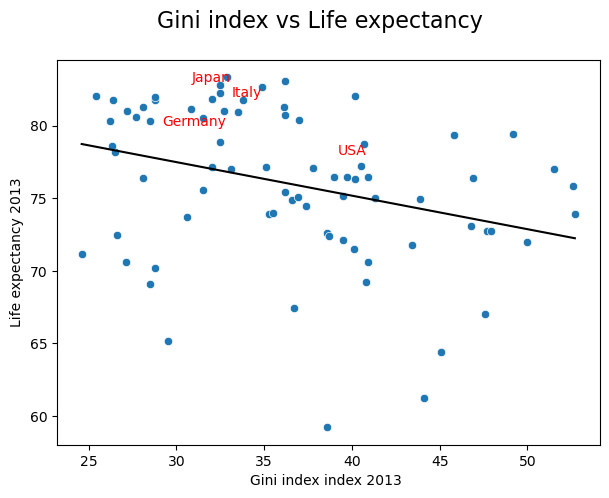

In [146]:
#// plot Gini index vs life expectancy 2013
fig, ax = plt.subplots( figsize=(7, 5))
fig.suptitle('Gini index vs Life expectancy', fontsize=16)
sns.scatterplot(x='2013', y=str('2013_life_expectancy'), data=df_Gini_2013, ax=ax)
ax.set_xlabel('Gini index index 2013 ')
ax.set_ylabel('Life expectancy 2013')
xfid = np.linspace(df_Gini_2013['2013'].min() ,df_Gini_2013['2013'].max(), 100)
sl, inte, r_value, p_value, std_err = linregress((df_Gini_2013['2013']), ( df_Gini_2013['2013_life_expectancy']))
ax.plot(xfid, sl*xfid+inte, color="black")
# annotation of Japan
(x, y) = (df_Gini_2013.loc[df_Gini_2013['Country Name']=="Japan"]["2013"].astype(int).to_numpy()[0],  df_Gini_2013.loc[df_Gini_2013['Country Name']=="Japan"]["2013_life_expectancy"].astype(int).to_numpy()[0])
ax.annotate("Japan", (x, y), fontsize=10, color="red", xytext=(0, 0),
                 textcoords='offset points', ha="center")
# annotation of USA
(x, y) = (df_Gini_2013.loc[df_Gini_2013['Country Name']=="United States"]["2013"].astype(int).to_numpy()[0],  df_Gini_2013.loc[df_Gini_2013['Country Name']=="United States"]["2013_life_expectancy"].astype(int).to_numpy()[0])
ax.annotate("USA", (x, y), fontsize=10, color="red", xytext=(0, 0),
                    textcoords='offset points', ha="center")
# Annotation of Germnay
(x, y) = (df_Gini_2013.loc[df_Gini_2013['Country Name']=="Germany"]["2013"].astype(int).to_numpy()[0],  df_Gini_2013.loc[df_Gini_2013['Country Name']=="Germany"]["2013_life_expectancy"].astype(int).to_numpy()[0])
ax.annotate("Germany", (x, y), fontsize=10, color="red", xytext=(0, 0),
                 textcoords='offset points', ha="center")
# Annotation of Italy
(x, y) = (df_Gini_2013.loc[df_Gini_2013['Country Name']=="Italy"]["2013"].astype(int).to_numpy()[0],  df_Gini_2013.loc[df_Gini_2013['Country Name']=="Italy"]["2013_life_expectancy"].astype(int).to_numpy()[0])
ax.annotate("Italy", (x, y), fontsize=10, color="red", xytext=(0, 0),
                    textcoords='offset points', ha="center")

            



Series([], Name: 2019, dtype: float64) Series([], Name: 2019_life_expectancy, dtype: float64)
80 30


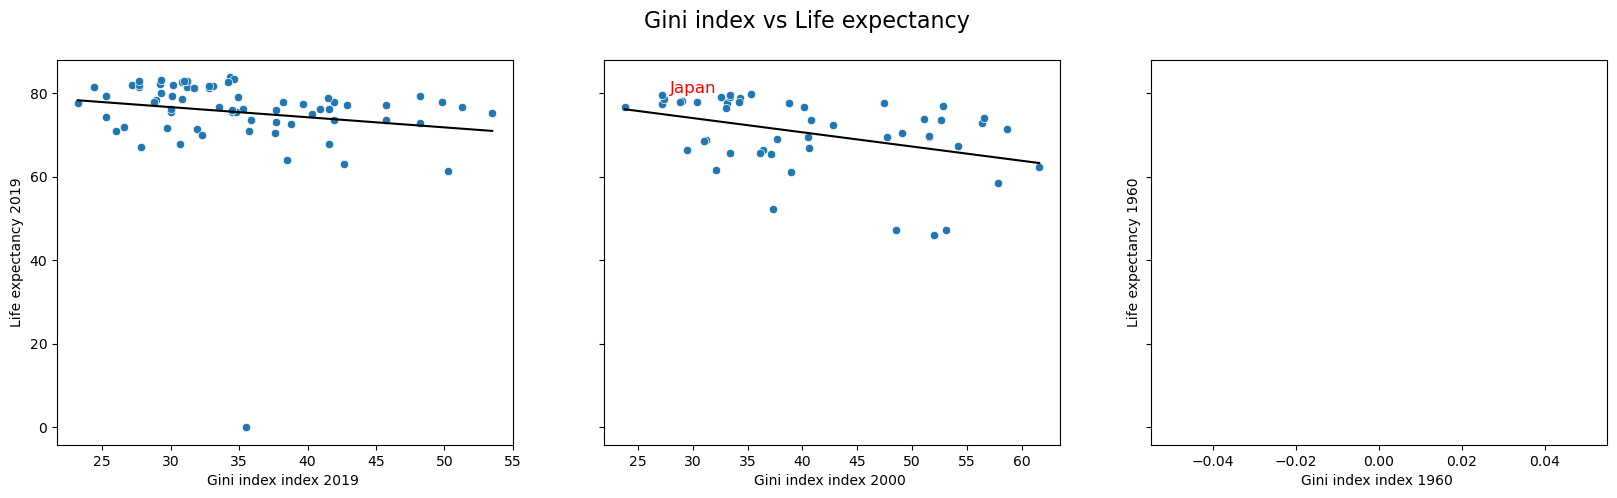

Gini Germany 2019: 31.7
Gini Italy 2019: 34.6
 R^2 2019 : 0.026633457155437523
 R^2 2000 : 0.15700118973441923


In [100]:
#// create a figure with 3 separeted figure of scatter plot for 2019, 2000 and 1960 of df_Gini_m against life expectancy_2019, life expectancy_2000 and life expectancy_1960
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
xfid = np.linspace(0, 100, 100)
# overall  figure  title
fig.suptitle('Gini index vs Life expectancy', fontsize=16)

#ax[0].scatter(df_Gini_m_2019['2019'], df_Gini_m_2019['2019_life_expectancy'])
sns.scatterplot(x='2019', y=str('2019_life_expectancy'), data=df_Gini_m_2019, ax=ax[0])
ax[0].set_xlabel('Gini index index 2019 ')
ax[0].set_ylabel('Life expectancy 2019')
xfid = np.linspace(df_Gini_m_2019['2019'].min() ,df_Gini_m_2019['2019'].max(), 100)
sl, inte, r_value, p_value, std_err = linregress((df_Gini_m_2019['2019']), ( df_Gini_m_2019['2019_life_expectancy']))
ax[0].plot(xfid, sl*xfid+inte, color="black")
#ax[0].set_title('Gini index index 2019 vs Life expectancy 2019')
#ax[1].scatter(df_Gini_m_2000['2000'], df_Gini_m_2000['2000_life_expectancy'])
sns.scatterplot(x='2000', y=str('2000_life_expectancy'), data=df_Gini_m_2000, ax=ax[1])
ax[1].set_xlabel('Gini index index 2000 ')
ax[1].set_ylabel('Life expectancy 2000')
xfid = np.linspace(df_Gini_m_2000['2000'].min() ,df_Gini_m_2000['2000'].max(), 100)
sl, inte, r_value, p_value, std_err = linregress((df_Gini_m_2000['2000']), ( df_Gini_m_2000['2000_life_expectancy']))
ax[1].plot(xfid, sl*xfid+inte, color="black")
y, x = (df_Gini_m_2019.loc[df_Gini_m_2019['Country Name']=="Japan"]["2013"],  df_Gini_m_2019.loc[df_Gini_m_2019['Country Name']=="Japan"]["2013_life_expectancy"]))
print(y, x)
y , x= 80, 30
print(y, x)
ax[1].annotate("Japan", (x, y), fontsize=12, color="red", xytext=(0, 0),
                 textcoords='offset points', ha="center")





#ax[1].set_title('Gini index index 2000 vs Life expectancy 2000')
ax[2].scatter(df_Gini_m_1960['1960'], df_Gini_m_1960['1960_life_expectancy'])
ax[2].set_xlabel('Gini index index 1960 ')
ax[2].set_ylabel('Life expectancy 1960')
xfid = np.linspace(df_Gini_m_1960['1960'].min() ,df_Gini_m_1960['1960'].max(), 100)
#sl, inte, r_value, p_value, std_err = linregress((df_Gini_m_1960['1960']), ( df_Gini_m_1960['1960_life_expectancy']))
ax[2].plot(xfid, sl*xfid+inte, color="black")
#ax[2].set_title('Gini index index 1960 vs Life expectancy 1960')
plt.show()



print("Gini Germany 2019:", df_Gini_m_2019.loc[(df_Gini_m_2019['Country Name']=='Germany')]['2019'].reset_index(drop=True)[0])
      #print("GDP germany 2019:", df_GDP_m_2019.loc[df_GDP_m_2019['Country Name']=='Germany']['2019'])
#print("Gini Japan 2019:", df_Gini_m_2019.loc[(df_Gini_m_2019['Country Name']=='ja')]['2019'].reset_index(drop=True)[0])
print("Gini Italy 2019:", df_Gini_m_2019.loc[(df_Gini_m_2019['Country Name']=='Italy')]['2019'].reset_index(drop=True)[0])
## r^2 calculation
print(" R^2 2019 :",R_squared((df_Gini_m_2019['2019']), ( df_Gini_m_2019['2019_life_expectancy'])) )
print(" R^2 2000 :",R_squared((df_Gini_m_2000['2000']), ( df_Gini_m_2000['2000_life_expectancy'])) )
#print(" R^2 1960 :",R_squared((df_Gini_m_1960['1960']), ( df_Gini_m_1960['1960_life_expectancy'])) )
#df_Gini_m_2000.loc[(df_Gini_m_2000['Country Name']=='Japan')]

How it could be noticed in the graphs above, where the Gini index od each contry is plotted against it's Life expectancy, the data point appear to be very noisy, that means that the linear regression is not able to give a very meaningfull representation of the data.

### Helath expediture

In [13]:
# Helath expediture index data
path_Health=r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\API_SH.XPD.CHEX.PP.CD_DS2_en_csv_v2_5363976\API_SH.XPD.CHEX.PP.CD_DS2_en_csv_v2_5363976.csv"
df_Health=pd.read_csv(path_Health, skiprows=4)
# remove  last column of df_Gini
df_Health=df_Health.drop(df_Health.columns[[-1]], axis=1)


# Extract years 2019, 2000, 1960
df_Health_= df_Health[["Country Name","2019", "2000", "1960"]]
df_Health_m = pd.merge(df_Health_, df_1960, on='Country Name', how='outer')
df_Health_m = pd.merge(df_Health_m, df_2000, on='Country Name', how='outer')
df_Health_m = pd.merge(df_Health_m, df_2019, on='Country Name', how='outer')
# fill Nan with 0
df_Health_m=df_Health_m.fillna(0)
# remove lines with 0 or Nan values#
df_Health_m_2019=df_Health_m[df_Health_m['2019'] != 0]
df_Health_m_2000=df_Health_m[df_Health_m['2000'] != 0]
df_Health_m_1960=df_Health_m[df_Health_m['1960'] != 0]
df_Health_m.head(2)



,Country Name,2019,2000,1960,1960_life_expectancy,2000_life_expectancy,2019_life_expectancy
0,Aruba,0.000000,0.000000,0.0,64.152000,73.569000,76.248000
1,Africa Eastern and Southern,217.456237,119.277317,0.0,44.085552,51.964481,63.755674


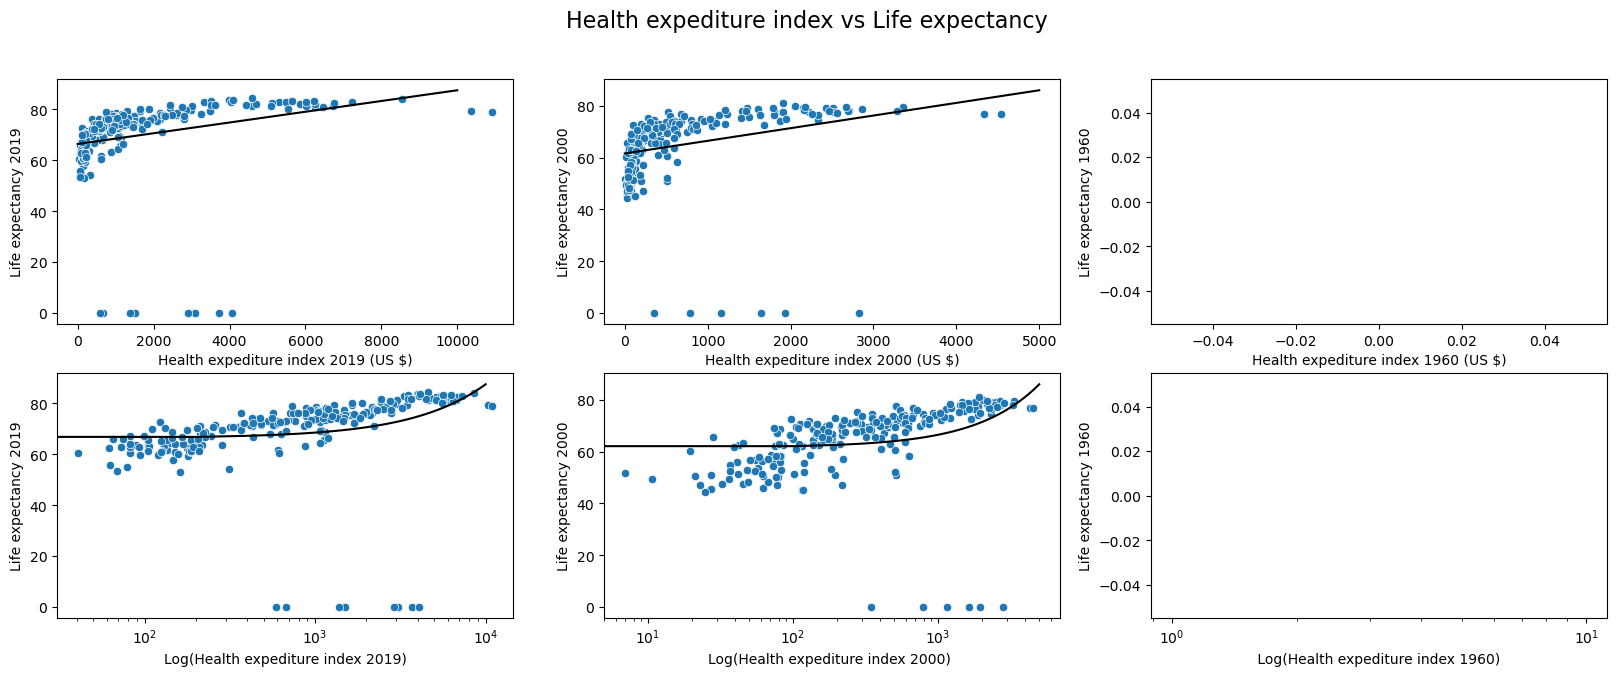

 R^2 2019 : 0.07553525878336509
 R^2 2000 : 0.08363600721556619


ValueError: Inputs must not be empty.

In [14]:
#// create a figure with 3 separeted figure of scatter plot for 2019, 2000 and 1960 of df_Health_m against life expectancy_2019, life expectancy_2000 and life expectancy_1960
fig, ax = plt.subplots(2,3, figsize=(20,7))
xfid = np.linspace(0,10000) 
xfid_1 = np.linspace(0,5000)
#// put overall  figure  title
fig.suptitle('Health expediture index vs Life expectancy', fontsize=16)

#ax[0].scatter(df_Health_m_2019['2019'], df_Health_m_2019['2019_life_expectancy'])
ax[0,0].set_xlabel('Health expediture index 2019 (US $)')
ax[0,0].set_ylabel('Life expectancy 2019')
sns.scatterplot(x='2019', y=str('2019_life_expectancy'), data=df_Health_m_2019, ax=ax[0,00])
#ax[0].set_xscale('log')
sl, inte, r_value, p_value, std_err = linregress((df_Health_m_2019['2019']), ( df_Health_m_2019['2019_life_expectancy']))
ax[0,0].plot(xfid, sl*xfid+inte, color="black")
#ax[0].set_xscale('log')

#ax[0].set_title('Health expediture index 2019 vs Life expectancy 2019')
#ax[1].scatter(df_Health_m_2000['2000'], df_Health_m_2000['2000_life_expectancy'])
sns.scatterplot(x='2000', y=str('2000_life_expectancy'), data=df_Health_m_2000, ax=ax[0,1])
ax[0,1].set_xlabel('Health expediture index 2000 (US $)')
ax[0,1].set_ylabel('Life expectancy 2000')
sl, inte, r_value, p_value, std_err = linregress((df_Health_m_2000['2000']), ( df_Health_m_2000['2000_life_expectancy']))
ax[0,1].plot(xfid_1, sl*xfid_1+inte, color="black")

#ax[1].set_xscale('log')
#ax[1].set_title('Health expediture index 2000 vs Life expectancy 2000')
ax[0,2].scatter(df_Health_m_1960['1960'], df_Health_m_1960['1960_life_expectancy'])
ax[0,2].set_xlabel('Health expediture index 1960 (US $)')
ax[0,2].set_ylabel('Life expectancy 1960')
#ax[2].set_title('Health expediture index 1960 vs Life expectancy 1960')



#ax[0].scatter(df_Health_m_2019['2019'], df_Health_m_2019['2019_life_expectancy'])
ax[1,0].set_xlabel('Log(Health expediture index 2019)')
ax[1,0].set_ylabel('Life expectancy 2019')
sns.scatterplot(x='2019', y=str('2019_life_expectancy'), data=df_Health_m_2019, ax=ax[1,0])
#ax[0].set_xscale('log')
sl, inte, r_value, p_value, std_err = linregress((df_Health_m_2019['2019']), ( df_Health_m_2019['2019_life_expectancy']))
ax[1,0].plot(xfid, sl*xfid+inte, color="black")
ax[1,0].set_xscale('log')

#ax[0].set_title('Health expediture index 2019 vs Life expectancy 2019')
#ax[1].scatter(df_Health_m_2000['2000'], df_Health_m_2000['2000_life_expectancy'])
sns.scatterplot(x='2000', y=str('2000_life_expectancy'), data=df_Health_m_2000, ax=ax[1,1])
ax[1,1].set_xlabel('Log(Health expediture index 2000) ')
ax[1,1].set_ylabel('Life expectancy 2000')
sl, inte, r_value, p_value, std_err = linregress((df_Health_m_2000['2000']), ( df_Health_m_2000['2000_life_expectancy']))
ax[1,1].plot(xfid_1, sl*xfid_1+inte, color="black")
ax[1,1].set_xscale('log')

#ax[1].set_title('Health expediture index 2000 vs Life expectancy 2000')
ax[1,2].scatter(df_Health_m_1960['1960'], df_Health_m_1960['1960_life_expectancy'])
ax[1,2].set_xlabel(' Log(Health expediture index 1960) ')
ax[1,2].set_ylabel('Life expectancy 1960')
#ax[2].set_title('Health expediture index 1960 vs Life expectancy 1960')


ax[1,2].set_xscale('log')
#plt.tight_layout
plt.show()

# R^2 calculation
print(" R^2 2019 :",R_squared((df_Health_m_2019['2019']), (df_Health_m_2019['2019_life_expectancy'])) )
print(" R^2 2000 :",R_squared((df_Health_m_2000['2000']), (df_Health_m_2000['2000_life_expectancy'])) )
print(" R^2 1960 :",R_squared((df_Health_m_1960['1960']), (df_Health_m_1960['1960_life_expectancy'])) )








In the above scatter plots above  the Gini Index from 2019 , 2000 and .. was shown against Life expectancy data of the same years.
How in the case of GDP, it could be seen a logaritmic behaviour, indeed by plotting the Helth expediture on a log scale the plot shows a linear pattern.
It could be explained by the fact that Helth expediture as GDP have a huge inpact on the Life expectancy until a minimum wealth status is reached which makes possible the applocation of safe  standard  and heath infrastuctures. However, when this point is reached additional expediture in helth care don't assure an increse of Life expectancy.

# PCA 


In [15]:
df_Gini_m.head(2)
df_Gini_m[["2019" ,"Country Name"]]

,2019,Country Name
0,0.0,Aruba
1,0.0,Africa Eastern and Southern
2,0.0,Afghanistan
3,0.0,Africa Western and Central
4,0.0,Angola
...,...,...
261,0.0,Kosovo
262,0.0,"Yemen, Rep."
263,0.0,South Africa
264,0.0,Zambia


In [ ]:
#// change 2000 2019 and 1960 to 2000GDP 2019GDP and 1960GDP
#// change 2000 2019 and 1960 to 2000Gini 2019Gini and 1960Gini
df_Gini_m1 = df_Gini_m[["Country Name", "2019","2000" ,"1960"]]
df_Gini_m1 = df_Gini_m1.rename(columns={'2000': '2000Gini', '2019': '2019Gini', '1960': '1960Gini'})
df_Health_m1 = df_Health_m[["Country Name", "2019","2000" ,"1960"]]
df_Health_m1= df_Health_m1.rename(columns={'2000': '2000Health', '2019': '2019Health', '1960': '1960Health'})


df_GDP_m1 = df_GDP_m.rename(columns={'2000': '2000GDP', '2019': '2019GDP', '1960': '1960GDP'})
df_INDEX1= pd.merge(df_Health_m1, df_Gini_m1, on='Country Name', how='outer')
df_INDEX = pd.merge(df_INDEX1, df_GDP_m1,  on='Country Name', how='outer')
df_INDEX.head(2)
"""df_INDEX=df_INDEX.fillna(0, inplace=True)
df_INDEX=df_INDEX[df_INDEX['2019Gini'] != 0]
df_INDEX=df_INDEX[df_INDEX['2019GDP'] != 0]
df_INDEX=df_INDEX[df_INDEX['2019Health'] != 0]"""
df_INDEX.head(2)

,Country Name,2019Health,2000Health,1960Health,2019Gini,2000Gini,1960Gini,2019GDP,2000GDP,1960GDP,1960_life_expectancy,2000_life_expectancy,2019_life_expectancy
0,Aruba,0.000000,0.000000,0.0,0.0,0.0,0.0,31650.760537,21023.157513,0.000000,64.152000,73.569000,76.248000
1,Africa Eastern and Southern,217.456237,119.277317,0.0,0.0,0.0,0.0,1512.270553,707.015752,162.913034,44.085552,51.964481,63.755674


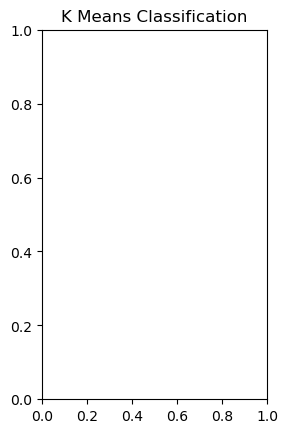

In [ ]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import scipy
from sklearn import decomposition

#digits = datasets.load_digits()      #load the digits dataset instead of the iris dataset


x = df_INDEX[['2019GDP', '2019Gini', '2019Health']] #was(iris.data)
x.columns = ['2019GDP', '2019Gini', '2019Health']

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(x)
x = pca.transform(x)


y = df_INDEX['2019_life_expectancy']
y.columns = ["2019_life_expectancy"]

# this line actually builds the machine learning model and runs the algorithm
# on the dataset
model = KMeans(n_clusters = 10)    #Run k-means on this datatset to cluster the data into 10 classes
model.fit(x)


In [ ]:
# PCA by computing SVD of Y

M, N= X.shape
print('X_shape', M, N)
#print(X.mean(0))

# a. Subtract the mean image from all the images
y_=np.ones(X.shape)*X.mean(0) # media dei pixel per colonna
X_pca=X - y_

print("X", X.shape,type(X))
print("y", y_.shape,type(y))
print("X_pca",np.shape(X_pca),type(X_pca))
print("X_mean",np.shape(X.mean(0)))

# PCA by computing SVD of Y
U,S,V = linalg.svd(X_pca,full_matrices=False)

V = V.T  # HERE do the traspost bc in svd it give me V_T and not  the real V
print("shape V:",np.shape(V))

rho = (S*S) / (S*S).sum() # utile in futuro

# Project data onto principal component space
Z = X_pca @ V

#print(V)
print("Z", Z.shape,type(Z))

In [ ]:
###################################       per bellezza
# Plot variance explained
plt.plot(rho[:30],'o-')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained value');

### R^2 / Pearson Correlation?

Feature selection/ PCA analysis? (if time)

# FOR VIDEO PRESENTATION


In [ ]:

# Read in the data
#"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\life_expectancy_by_country.csv"
#df = pd.read_csv(r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\life_expectancy_by_country.csv")
for col in df.columns:
    print(col)
df_2019 = df[df['year'] == 2019]

df_1960 = df[df['year'] == 1960]

print(df_1960.shape)
print(df_2019.shape)

# make barplot of values by country_name sorted
shortened_list = [
    'Hong Kong: China',
    'Sweden',
    'Gibraltar',
    'Greece',
    'Post-DD',
    'US Virgin Isl.',
    'Antigua/B.',
    'Slovakia',
    'E. Asia/Pac.',
    'Iran',
    'Romania',
    'Grenada',
    'Nicaragua',
    'Kazakhstan',
    'El Salvador',
    'Ukraine',
    'Uzbekistan',
    'S. Asia',
    'Other S. States',
    'Pakistan',
    'Botswana',
    'Africa E/S',
    'Zambia',
    'Sub-Saharan', 
    'Sierra Leone', 
    'Chad'
]

df_2019_select = df_2019.sort_values(by=['value'], ascending=False).iloc[::10, :]
df_2019_select['country_name'] = shortened_list

print(df_2019_select.country_name.to_list())
plt.figure(figsize=(12, 5))
sns.barplot(x='country_name', y='value', data=df_2019_select)
plt.ylabel('Life expectancy at birth (years)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Life expectancy by country in 2019')
plt.show()





# BOKEH

In [ ]:
df_BOKEH= df.pivot_table(index='country_name', columns='year', values='value').reset_index("country_name")
df_BOKEH.head(2)

In [ ]:
df_BOKEH_used=df_BOKEH[["country_name",1960, 1961,2018,2019,2020]]
df_BOKEH_used_final=df_BOKEH_used[0:12]


source = ColumnDataSource(df_BOKEH_used_final)   #WHY????????




# World Plots

## Life expectancy World-Plot



In [11]:
#// plot with Plotly with time 

colors = px.colors.sequential.YlGnBu
fig = px.choropleth(df, locations="country_name", 
                    locationmode='country names', color="value", 
                    hover_name="country_name", 
                    animation_frame="year",
                    projection="natural earth",
                    range_color=[30, 90],
                    #range_color=[df.value.min(), df.value.max()],
                    labels={'value':'Years'},
                    color_continuous_scale=['rgb(255, 255, 255)'] + px.colors.sequential.YlGnBu + ['rgb(0, 0, 0)'])
                    #color_continuous_scale=px.colors.diverging.RdYlBu)
# Updated Layout
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
fig.update_layout(title_text='Life Expectancy at Birth World Map ',title_x=0.5,titlefont_size=20,),
fig.update_layout(height=600, margin=dict(l=80, r=80, t=40, b=50))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
# Show Plotted Figure
fig.show()





## Store Image of Generated PLot 
#fig.write_image("../figures/vote_change_map.png", width = 600, height = 400)
fig.write_html("world.html")

## Wolrd map GDP

In [ ]:
#df_GDP.head(10)

In [10]:
df_GDP_World = df_GDP.fillna(0)

df_GDP_World = df_GDP.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
             var_name='year', value_name='GDP').sort_values(by=['Country Name',"year"])

df_GDP_World = df_GDP_World.reset_index(drop=True)
#df_GDP_World.head(10)

NameError: name 'df_GDP' is not defined

In [ ]:
df_GDP_World_1=df_GDP_World.loc[df_GDP_World['GDP'] >= 150000]
print("max",df_GDP_World["GDP"].max())
print("max",df_GDP_World.max())
print(df_GDP_World_1["Country Name"].unique())
#df_GDP_World_1

In [ ]:
# remove tax havens to have a better visualization
df_GDP_World_1=df_GDP_World.loc[df_GDP_World['Country Name'] != 'Lichtenstein']
df_GDP_World_1=df_GDP_World_1.loc[df_GDP_World_1['Country Name'] != 'Monaco']
df_GDP_World_1=df_GDP_World_1.loc[df_GDP_World_1['Country Name'] != 'Liechtenstein']
df_GDP_World_1=df_GDP_World_1.loc[df_GDP_World_1['Country Name'] != 'Luxembourg']
df_GDP_World_1=df_GDP_World_1.loc[df_GDP_World_1['Country Name'] != 'Bermuda']
df_GDP_World_2=df_GDP_World_1.loc[df_GDP_World_1['GDP'] >= 110000]
print(df_GDP_World_2["Country Name"].unique())

Most of the World's tax heaven are been removed (Lichtenstein, Monaco, Luxemburg; Bermuda), to have a clearer visualization.
Coming to Ireland, even if it could be claimed to have a tax Heaven legislation for Europe standards it was decided not to remove it for two main reasons: its GDP per Capita value even if not really representative for the real county wealth production, it  appears to have a comparable scale to  world's richest county; secondly due to Ireland's not indifferent spatial extention.

In [ ]:
#// plot with Plotly with time 
fig1 = px.choropleth(df_GDP_World_1,locations='Country Name', 
                     locationmode='country names', color="GDP", 
                    hover_name='Country Name',
                    animation_frame="year",
                    projection="natural earth",
                    #range_color=[0,100000 ],
                    #range_color=[df_GDP_World_1.GDP.min(), df_GDP_World_1.GDP.max()],
                    labels={'GDP':'GDP '},
                    color_continuous_scale=px.colors.sequential.YlGnBu)
                    #color_continuous_scale=px.colors.diverging.RdYlBu)

# Updated Layout
fig1.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
fig1.update_layout(title_text='GDP per capita (US$)',title_x=0.5,titlefont_size=20,),
fig1.update_layout(height=600, margin=dict(l=80, r=80, t=40, b=50))
# Show Plotted Figure
fig1.show()




#DESEASE


In [7]:
# load data
#chosen quantile
Q= 0.9
## ITALY
#df_IT2000= pd.read_excel(r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\Cause\italy2000.xlsx")
df_IT2019 = pd.read_excel("data/italy (1).xlsx")

df_IT2019=df_IT2019.sort_values(by=['Death rate per 100 000 population'],ascending=False)
z=df_IT2019['Death rate per 100 000 population'].quantile(q=Q,interpolation='linear')
df_IT2019_1=df_IT2019.loc[df_IT2019['Death rate per 100 000 population'] >= z]
## GERMANY
#df_GE2000= pd.read_excel(r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\Cause\germany2000.xlsx")
df_GE2019 = pd.read_excel("data/germany (1).xlsx")
df_GE2019=df_GE2019.sort_values(by=['Death rate per 100 000 population'],ascending=False)

y=df_GE2019['Death rate per 100 000 population'].quantile(q=Q,interpolation='linear')
df_GE2019_1=df_GE2019.loc[df_GE2019['Death rate per 100 000 population'] >= y]

## JAPAN
#df_JA2000= pd.read_excel(r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL_DATA\FINAL PROJECT\project\social_data_project-master\Cause\japan2000.xlsx")
df_JA2019 = pd.read_excel("data/japan (1).xlsx")
df_JA2019= df_JA2019.sort_values(by=['Death rate per 100 000 population'],ascending=False)
df_JA2019
x=df_JA2019['Death rate per 100 000 population'].quantile(q=Q,interpolation='linear')

#// extract the top 50% of the data df_JA2019['Death rate per 100 000 population']
df_JA2019_1=df_JA2019.loc[df_JA2019['Death rate per 100 000 population'] >= x]

df_US2019 = pd.read_excel("data/united_states.xlsx")
df_US2019= df_US2019.sort_values(by=['Death rate per 100 000 population'],ascending=False)
df_US2019
w=df_US2019['Death rate per 100 000 population'].quantile(q=Q,interpolation='linear')

#// extract the top 50% of the data df_JA2019['Death rate per 100 000 population']
df_US2019_1=df_US2019.loc[df_US2019['Death rate per 100 000 population'] >= w]

print("IT:", df_IT2019_1.shape)
print("GE:", df_GE2019_1.shape)
print("JA:", df_JA2019_1.shape)
print("US:", df_US2019_1.shape)
df_GE2019_1

IT: (14, 11)
GE: (14, 11)
JA: (14, 11)
US: (14, 11)


,Code,Cause,ISO3,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
0,1130,Ischaemic heart disease,DEU,2019,BTSX,ALLAges,83500000,147054.90,176.11,2187436.0,2619.68
1,950,Alzheimer disease and other dementias,DEU,2019,BTSX,ALLAges,83500000,51168.11,61.28,881377.2,1055.54
2,1140,Stroke,DEU,2019,BTSX,ALLAges,83500000,49793.53,59.63,900009.8,1077.86
3,680,"Trachea, bronchus, lung cancers",DEU,2019,BTSX,ALLAges,83500000,46560.05,55.76,1015442.0,1216.10
4,1180,Chronic obstructive pulmonary disease,DEU,2019,BTSX,ALLAges,83500000,42796.95,51.25,1076601.0,1289.34
5,1120,Hypertensive heart disease,DEU,2019,BTSX,ALLAges,83500000,26795.54,32.09,317382.5,380.10
6,650,Colon and rectum cancers,DEU,2019,BTSX,ALLAges,83500000,26025.88,31.17,517670.3,619.96
7,1270,Kidney diseases,DEU,2019,BTSX,ALLAges,83500000,22770.44,27.27,379253.8,454.20
8,390,Lower respiratory infections,DEU,2019,BTSX,ALLAges,83500000,20712.41,24.81,284724.2,340.99
9,700,Breast cancer,DEU,2019,BTSX,ALLAges,83500000,18842.00,22.57,456089.4,546.21


In [3]:
df111= df_JA2019.loc[df_JA2019["Cause"]=="Hypertensive heart disease" ]
df111

,Code,Cause,ISO3,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
28,1120,Hypertensive heart disease,JPN,2019,BTSX,ALLAges,127000000,6673.12,5.25,96697.55,76.14


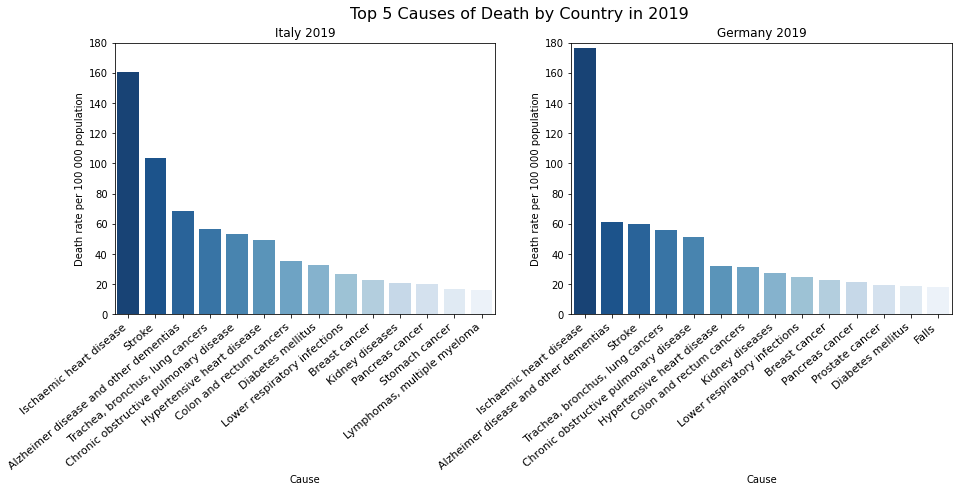

In [6]:
#// plot with sns  3 barplot


fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=    False)
fig.suptitle('Top 5 Causes of Death by Country in 2019', fontsize=16)

sns.barplot(ax=ax[0], y="Death rate per 100 000 population", x="Cause", data=df_IT2019_1, palette="Blues_r")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right", fontsize=11)
ax[0].set_title('Italy 2019')
ax[0].set_ylabel('Death rate per 100 000 population')
ax[0].set_xlabel('Cause')
ax[0].set_ylim(0, 180)
sns.barplot(ax=ax[1], y="Death rate per 100 000 population", x="Cause", data=df_GE2019_1, palette="Blues_r")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right", fontsize=11)

ax[1].set_title('Germany 2019')
ax[1].set_ylabel('Death rate per 100 000 population')
ax[1].set_xlabel('Cause')
ax[1].set_ylim(0, 180)
#sns.barplot(ax=ax[2], y="Death rate per 100 000 population", x="Cause", data=df_JA2019_1, palette="Blues_r")

"""
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right", fontsize=7)

ax[2].set_ylim(0, 180)


ax[2].set_title('Japan 2019')
ax[2].set_ylabel('Death rate per 100 000 population')
ax[2].set_xlabel('Cause')
"""
plt.show()




I feel a bit confused on what it really shows the plot above , or how to make it better so that helps us on telling our story.
IT's diffcicult to say from that 


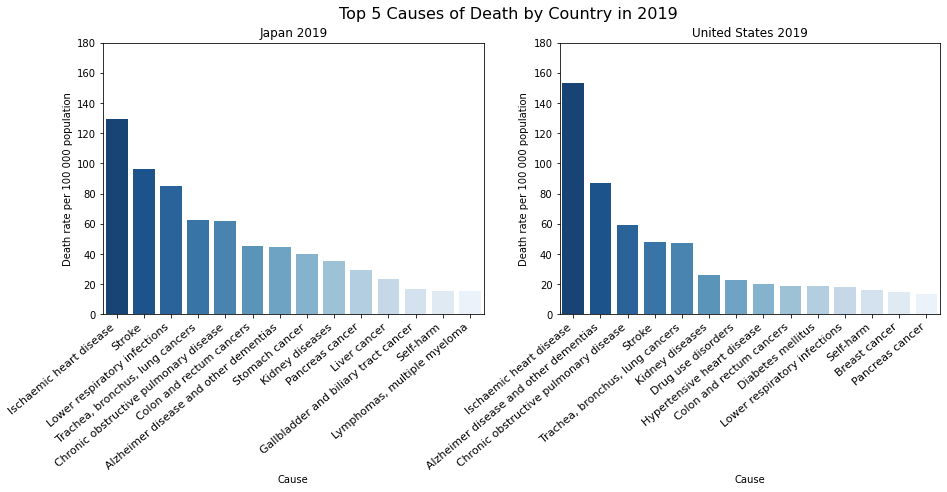

In [10]:
#// plot with sns  3 barplot


fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=    False)
fig.suptitle('Top 5 Causes of Death by Country in 2019', fontsize=16)

sns.barplot(ax=ax[0], y="Death rate per 100 000 population", x="Cause", data=df_JA2019_1, palette="Blues_r")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right", fontsize=11)
ax[0].set_title('Japan 2019')
ax[0].set_ylabel('Death rate per 100 000 population')
ax[0].set_xlabel('Cause')
ax[0].set_ylim(0, 180)
sns.barplot(ax=ax[1], y="Death rate per 100 000 population", x="Cause", data=df_US2019_1, palette="Blues_r")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right", fontsize=11)

ax[1].set_title('United States 2019')
ax[1].set_ylabel('Death rate per 100 000 population')
ax[1].set_xlabel('Cause')
ax[1].set_ylim(0, 180)
#sns.barplot(ax=ax[2], y="Death rate per 100 000 population", x="Cause", data=df_JA2019_1, palette="Blues_r")

"""
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right", fontsize=7)

ax[2].set_ylim(0, 180)


ax[2].set_title('Japan 2019')
ax[2].set_ylabel('Death rate per 100 000 population')
ax[2].set_xlabel('Cause')
"""
plt.show()


